## ADTA 5340 FINAL PROJECT

Akhila,Madanapati - 11710780   
 Bathina,Satya Sree  - 11800935  
 Chukkaluri,Anu Reddy - 11715021                                                                                               
 Neella,Swarna  - 11650256       

## Objective:
**The main goal of this analysis is to develop a machine learning model to predict the Air Quality Index(AQI) which is based on various pollutants such as SO2,NO2,RSPM, and PM2.5.The dataset contains pollution levels for different states ,the goal is to forecast the AQI using regression techniques.this includes handling missing data ,feature engineering ,exploratory data analysis, model training and evaluation using metrics like R-squared and Mean Sqaured Error(MSE).**

We are installing the necessary libraries for data analysis and visualization, including:
**pandas**: For data manipulation.
**matplotlib** and **seaborn**: For creating visualizations.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

The dataset is loaded into a pandas DataFrame from a CSV file using the `read_csv` function. The encoding 'latin1' is specified to handle non-UTF-8 characters in the data.


In [4]:
data = pd.read_csv('data.csv', encoding='latin1')

In [5]:
data.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,01-02-1990
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,01-02-1990
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,01-02-1990
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,01-03-1990
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,01-03-1990


In [6]:
data.shape

(435742, 13)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [8]:
data.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

**It provides information regarding numerical columns ('so2', 'no2', 'rspm', 'spm', 'pm2_5') available in the dataset which we will require to handle the missing values. This code fills all NaN for categorical columns ('stn_code', 'state', 'location', 'type') with the most common value (mode) of that column. Then, you can convert the sampling_date and the date columns into pandas' datetime format using pd. Moreover, if any date entry is invalid or wrong, the return will be NaT with errors='coerce'. From the sampling_date column, we create two new features, month and year, which represent the month and year of each sample, respectively. It is useful for understanding seasonal behaviors and time series trends.**


In [9]:
# Handling missing values
numerical_columns = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']

In [10]:
# Fill missing categorical values with the most frequent value
categorical_columns = ['stn_code', 'state', 'location', 'type']
data[categorical_columns] = data[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))

In [11]:
# Convert date fields to datetime format
data['sampling_date'] = pd.to_datetime(data['sampling_date'], errors='coerce')
data['date'] = pd.to_datetime(data['date'], errors='coerce')

In [12]:
# Create new features 
data['month'] = data['sampling_date'].dt.month
data['year'] = data['sampling_date'].dt.year

In [13]:
data.shape

(435742, 15)

In [14]:
data.nunique()
# These are all the unique values present in the dataframe

stn_code                        803
sampling_date                  4912
state                            37
location                        304
agency                           64
type                             10
so2                            4197
no2                            6864
rspm                           6065
spm                            6668
location_monitoring_station     991
pm2_5                           433
date                           2167
month                            12
year                             16
dtype: int64

# **DATA PREPROCESSING**

In [15]:
data.describe()

,sampling_date,so2,no2,rspm,spm,pm2_5,date,month,year
count,412695,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000,188020,412695.000000,412695.000000
mean,2010-10-05 10:07:49.322865664,10.829414,25.809623,108.832784,220.783480,40.791467,2008-11-14 18:31:27.271566592,6.511574,2010.262579
min,1987-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,3.000000,1987-01-01 00:00:00,1.000000,1987.000000
25%,2008-01-01 00:00:00,5.000000,14.000000,56.000000,111.000000,24.000000,2006-08-10 00:00:00,4.000000,2008.000000
50%,2011-03-07 00:00:00,8.000000,22.000000,90.000000,187.000000,32.000000,2010-04-12 00:00:00,7.000000,2011.000000
75%,2013-10-24 00:00:00,13.700000,32.200000,142.000000,296.000000,46.000000,2013-06-12 00:00:00,10.000000,2013.000000
max,2015-12-31 00:00:00,909.000000,876.000000,6307.033333,3380.000000,504.000000,2015-12-12 00:00:00,12.000000,2015.000000
std,NaN,11.177187,18.503086,74.872430,151.395457,30.832525,NaN,3.444142,3.666087


**The code generates summary statistics like mean, std dev, min ,max and quartiles for the numerical column.this helps in understanding the distribution and characteristics of data.**

In [16]:
#  Summary statistics
print("\nSummary Statistics for Numerical Columns:")
print(data[numerical_columns].describe())


Summary Statistics for Numerical Columns:
                 so2            no2           rspm            spm        pm2_5
count  401096.000000  419509.000000  395520.000000  198355.000000  9314.000000
mean       10.829414      25.809623     108.832784     220.783480    40.791467
std        11.177187      18.503086      74.872430     151.395457    30.832525
min         0.000000       0.000000       0.000000       0.000000     3.000000
25%         5.000000      14.000000      56.000000     111.000000    24.000000
50%         8.000000      22.000000      90.000000     187.000000    32.000000
75%        13.700000      32.200000     142.000000     296.000000    46.000000
max       909.000000     876.000000    6307.033333    3380.000000   504.000000


In [17]:
data.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date', 'month', 'year'],
      dtype='object')

# Frequency of measurement in each State

**In this code will plot a bar graph showing the occurrence count of the values in the column state. It tells how many times each state appears in the dataset. The x-axis labels are rotated, and labels are added for the plot.**

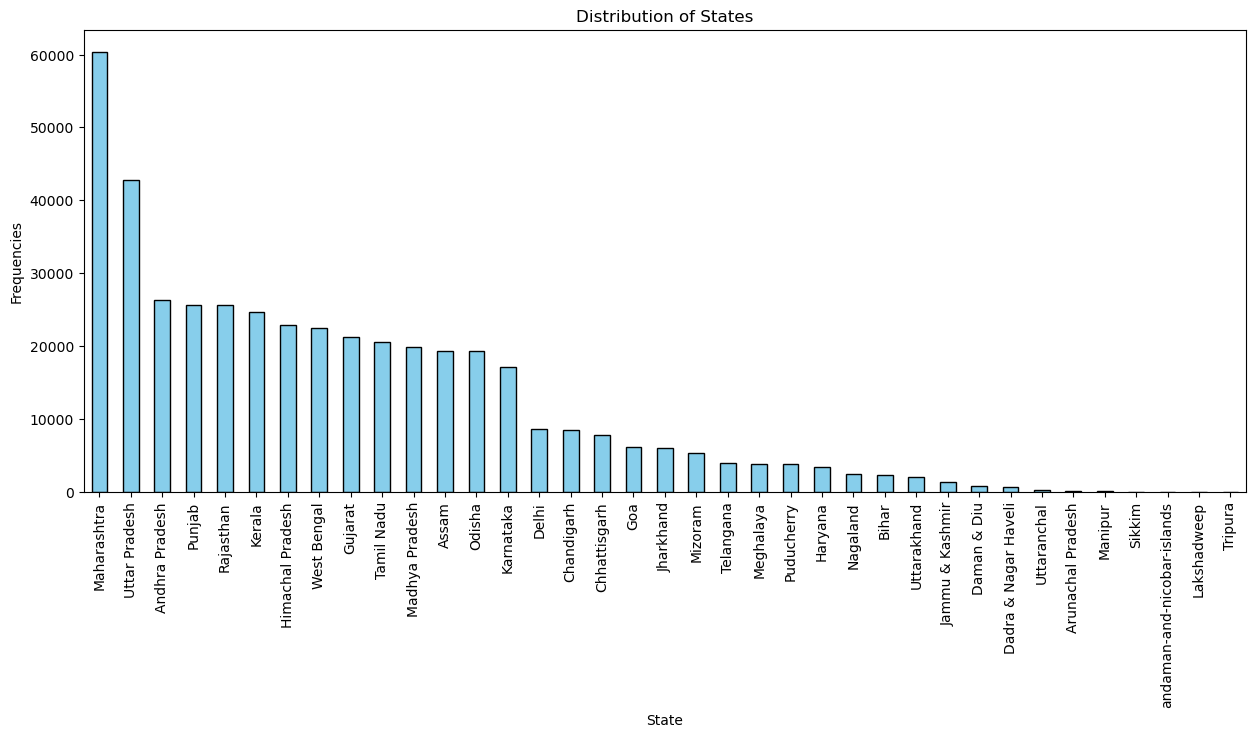

In [18]:
# Bar graph for the distribution of the 'state' column
plt.figure(figsize=(15, 6))
state_counts = data['state'].value_counts()
state_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Frequencies')
plt.title('Distribution of States')
plt.show()

# So2 levels in each state

**This code creates a bar plot of the average SO2 levels by state. This uses seaborn's barplot function to show the mean SO2 versus state, i.e., plotting 'state' on the x-axis and the mean SO2 on the y-axis. TLDR: plot rotated x-axis labels for better readability.ted x-axis labels for better readability.**

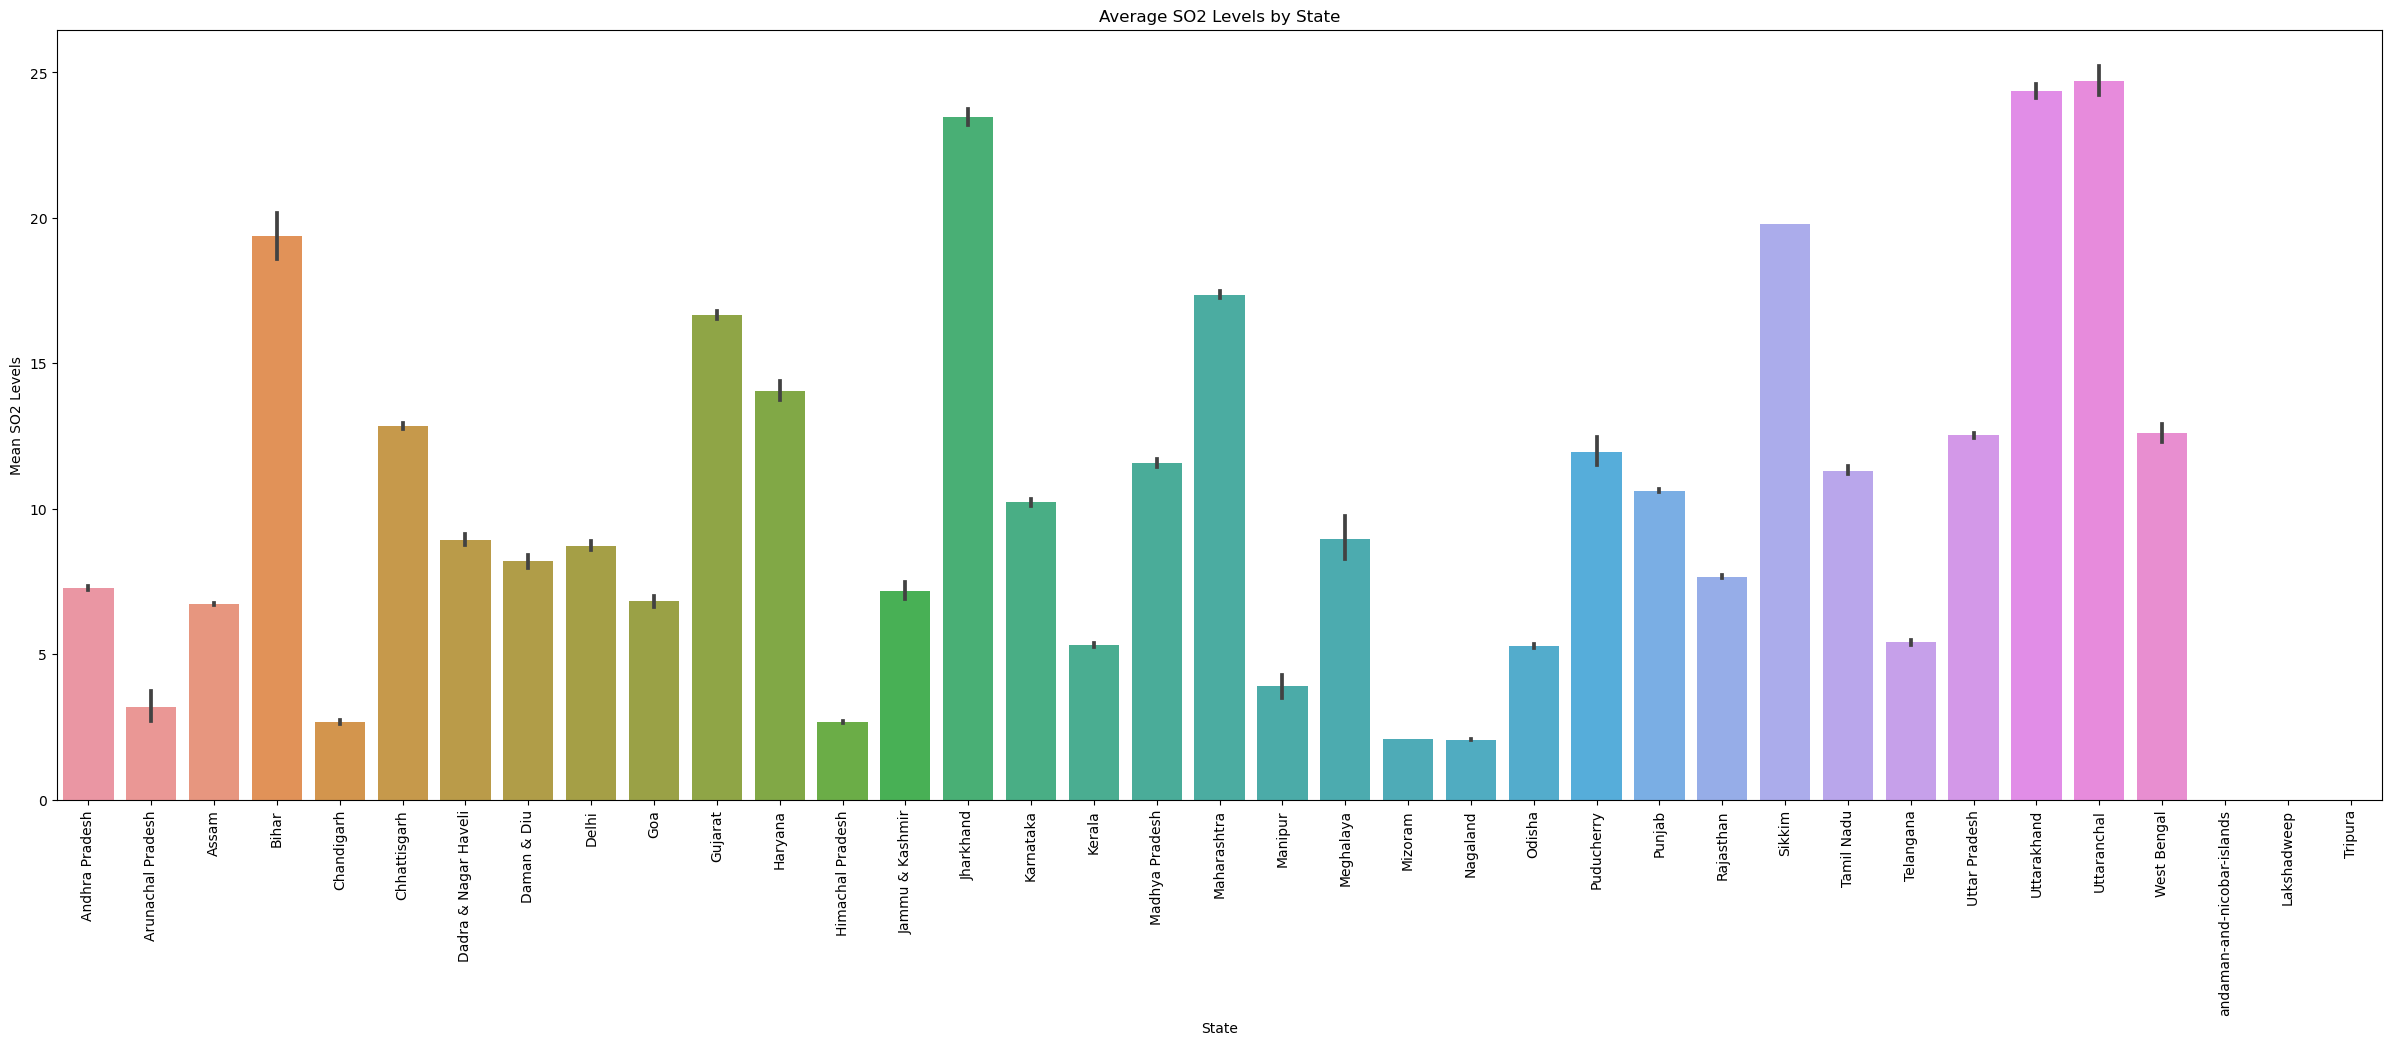

In [19]:
plt.figure(figsize=(30, 10))
sns.barplot(x='state',y='so2',data=data)

plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Mean SO2 Levels')
plt.title('Average SO2 Levels by State')
plt.show()

# No2 levels in each state 

**The following code produces a plot with the average NO2 states: Here, we return to the seaborn barplot functionality, with states in x and the recorded average NO2 measuring this value in y. Ye enables plotting data points with bars, which receive an x-axis and an orientation. We show the bars orange here, and we also rotate the x-axis for better reading.**

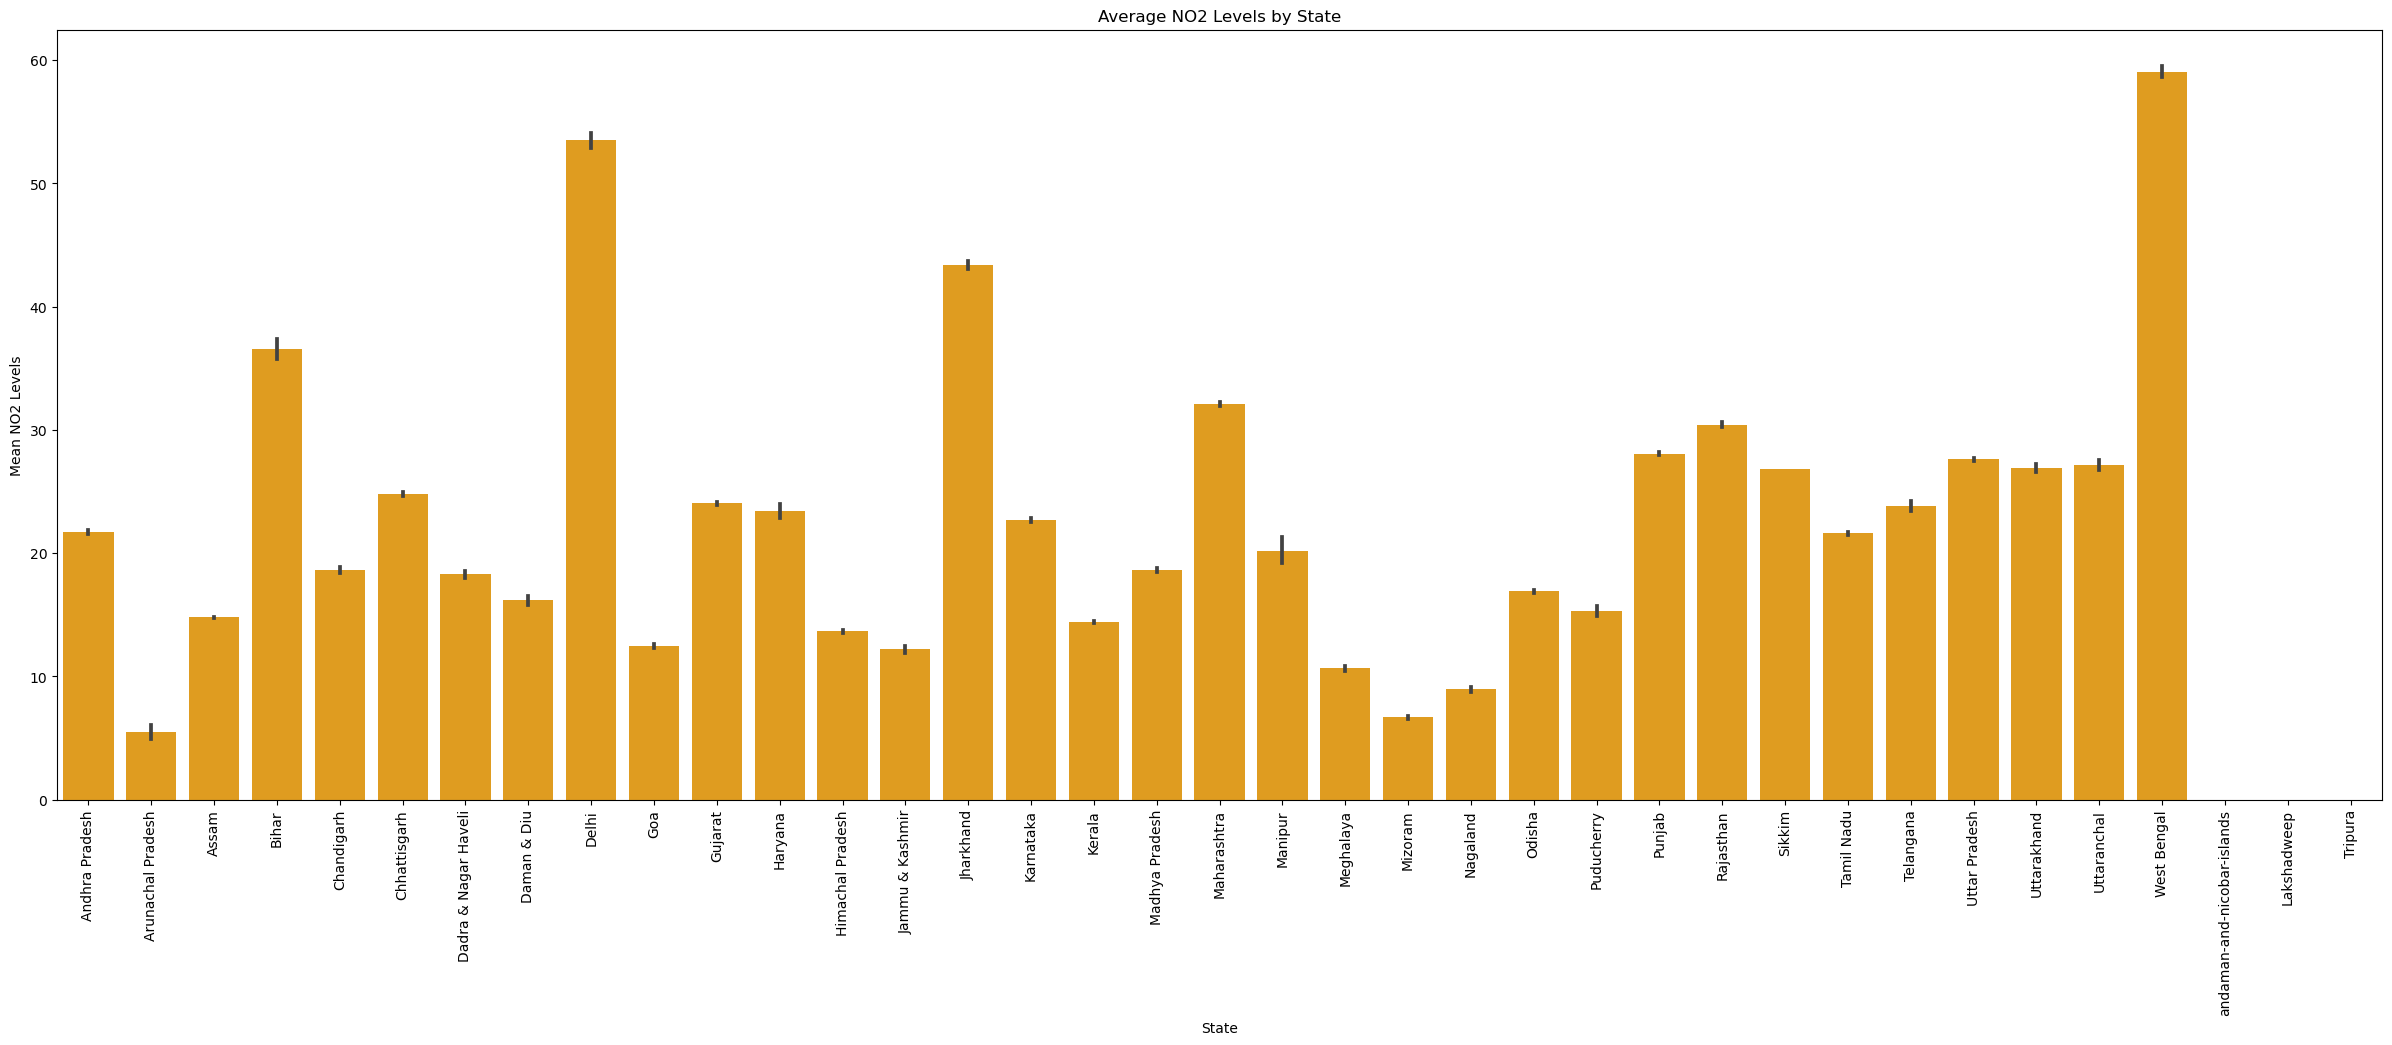

In [20]:
plt.figure(figsize=(30, 10))
sns.barplot(x='state', y='no2', data=data, color='orange')

plt.xticks(rotation=90)
plt.title('Average NO2 Levels by State')
plt.xlabel('State')
plt.ylabel('Mean NO2 Levels')
plt.show()  

# Rspm levels in each state 

**It creates a bar plot of average RSPM state-wise. It uses the seaborn barplot function with the 'state' (on the x-axis) and mean RSPM levels (on the y), where the bars are purple and the states on the x-axis are rotated. Note also that you have a title and axis labels.**

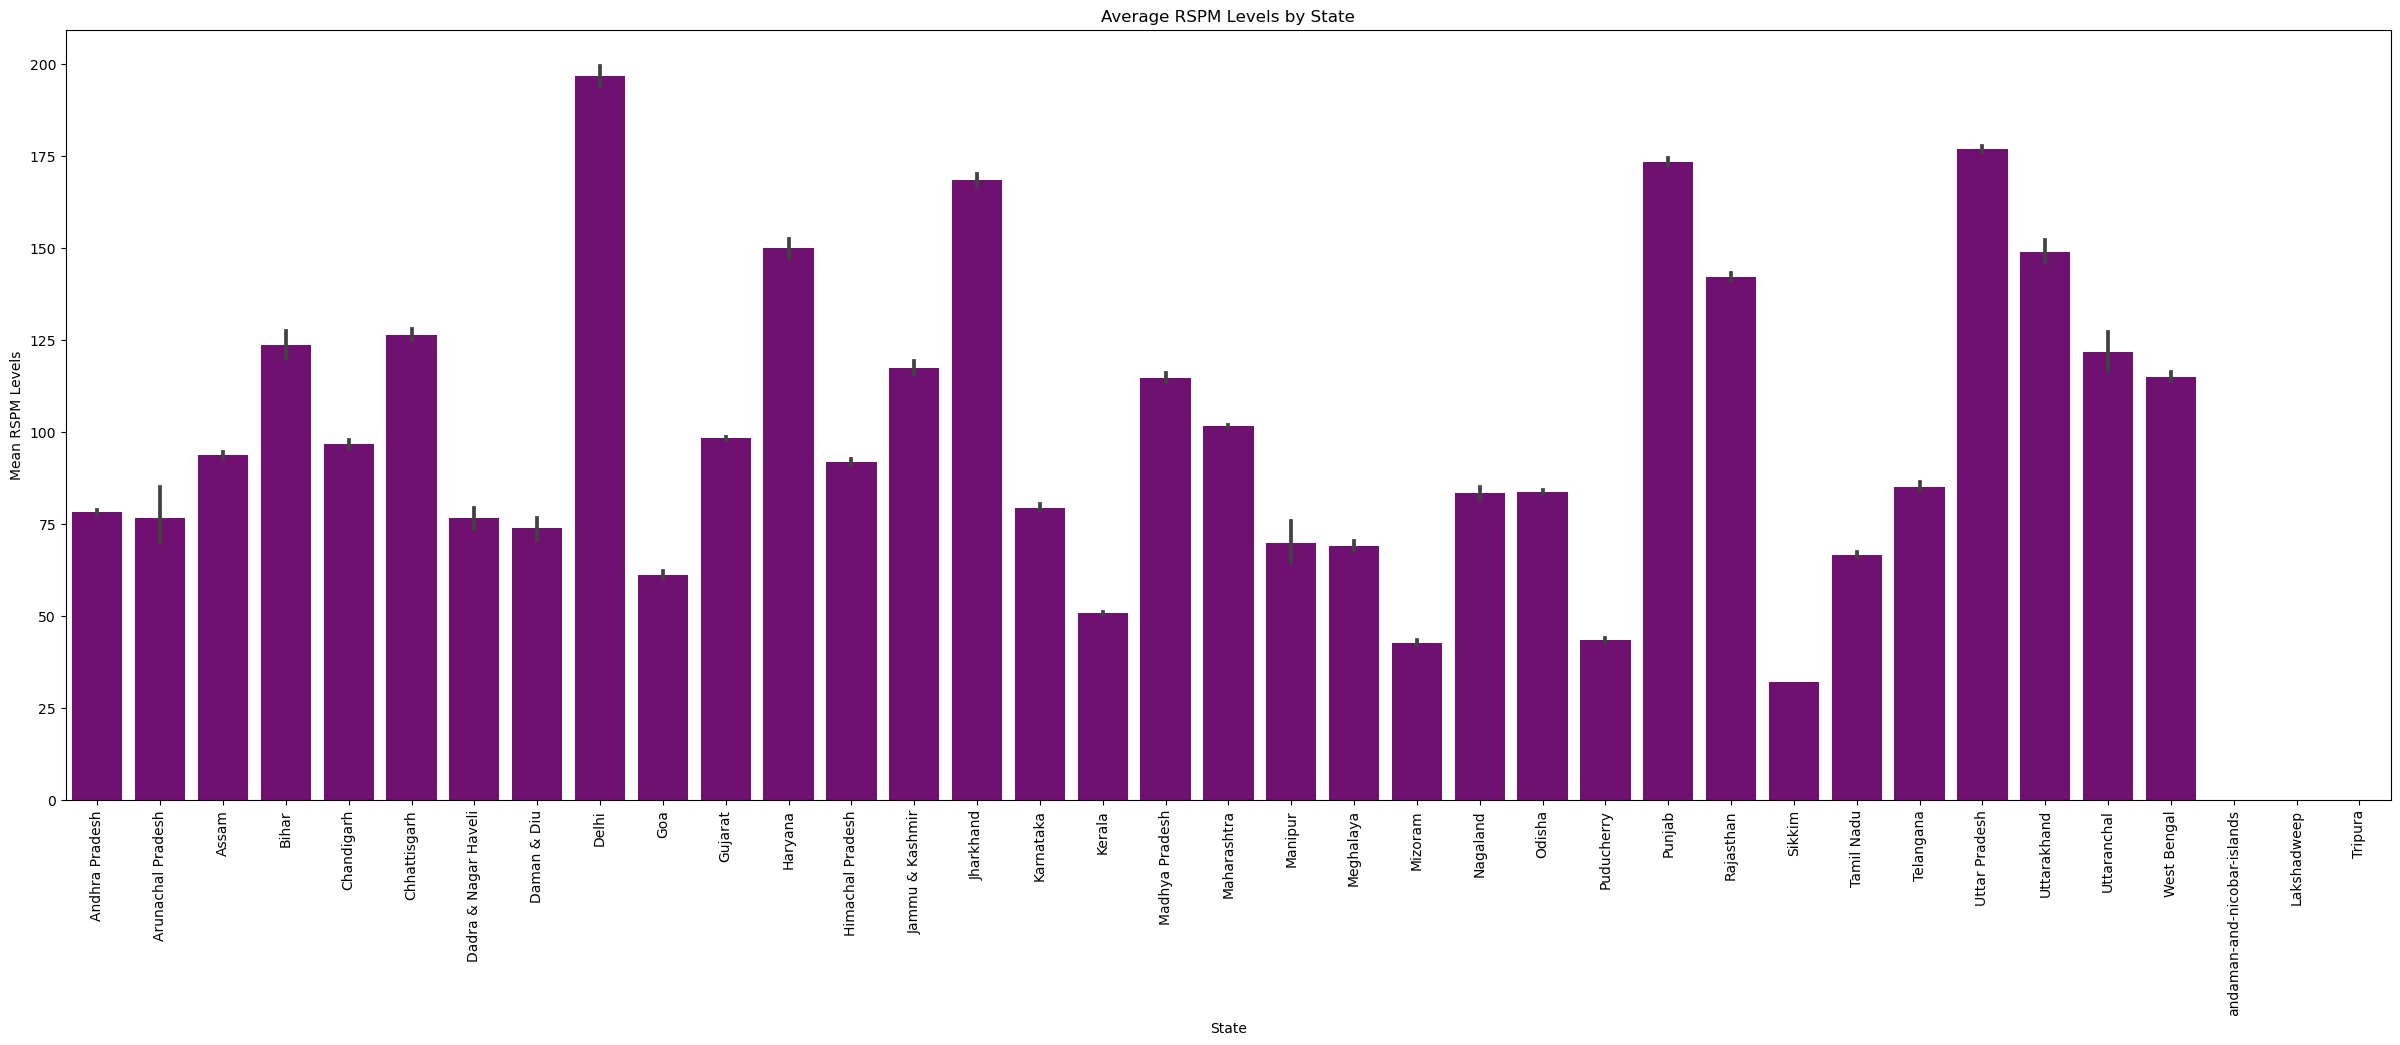

In [21]:
plt.figure(figsize=(30, 10))
sns.barplot(x='state', y='rspm', data=data, color='purple')  
plt.xticks(rotation=90)
plt.title('Average RSPM Levels by State')
plt.xlabel('State')
plt.ylabel('Mean RSPM Levels')
plt.show()

# pm2_5 levels in each state 


**This code plots a bar plot of avg PM2.5 (Particulate Matter 2.5) state levels. The 'state' is on the x-axis, while mean PM2.5 levels are on the y-axis. The bars are orchid, and the plot features rotated x-axis labels, a title, and axis labels for readability.**

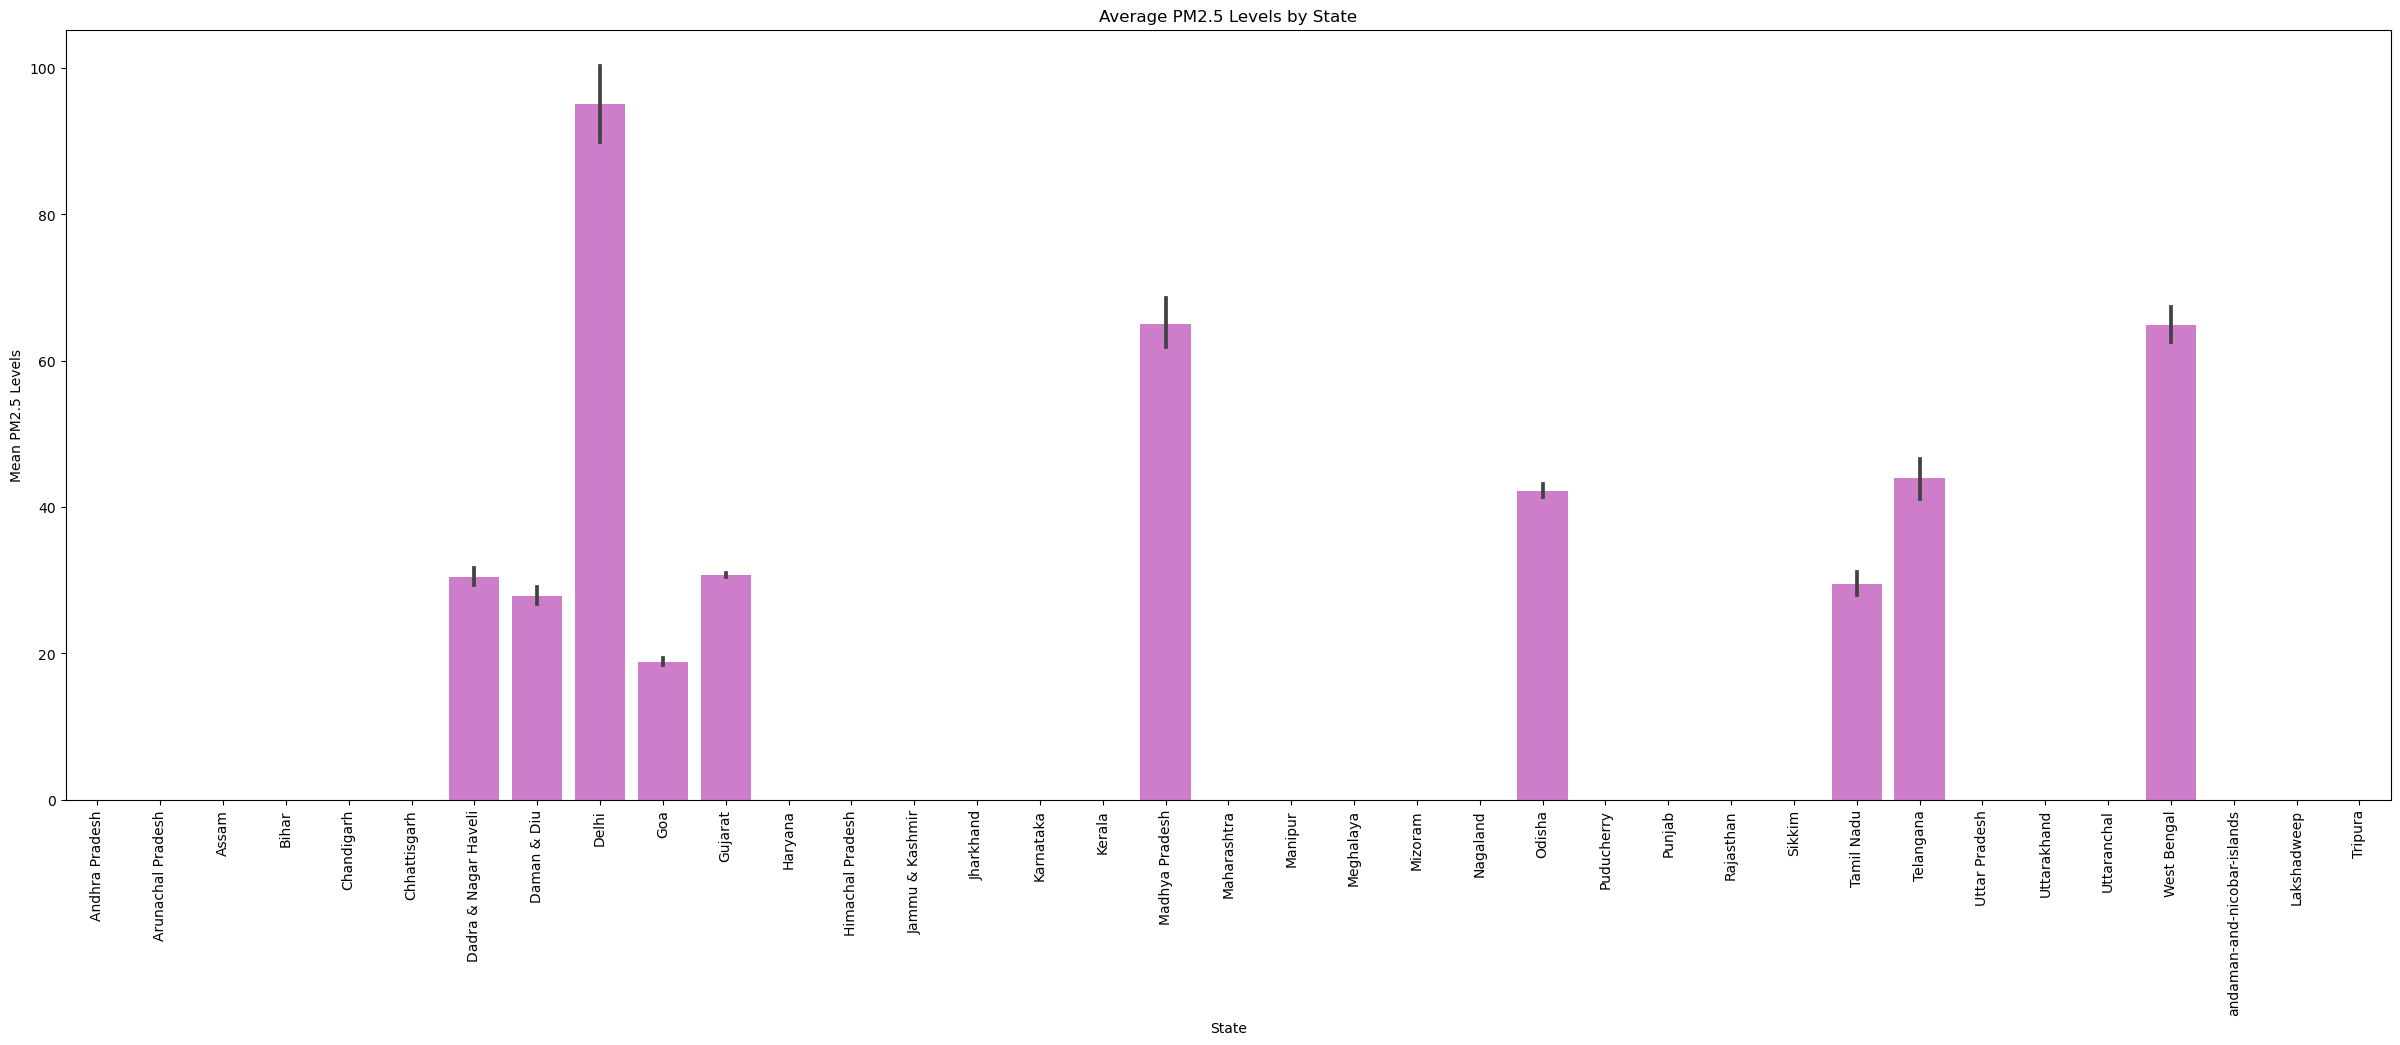

In [22]:
plt.figure(figsize=(30, 10))
sns.barplot(x='state', y='pm2_5', data=data, color= 'orchid') 

plt.xticks(rotation=90)
plt.title('Average PM2.5 Levels by State')
plt.xlabel('State')
plt.ylabel('Mean PM2.5 Levels')
plt.show()

The data is encoded to convert categorical to numerical data.

In [23]:
data['state_encoded'] = LabelEncoder().fit_transform(data['state'])

**This scatter plot visualizes the relationship between SO2 (Sulfur Dioxide) and NO2 (Nitrogen Dioxide) levels, with PM2.5 concentration represented by different colors (hue). The plot includes a title, axis labels, and a legend to help interpret the data.**

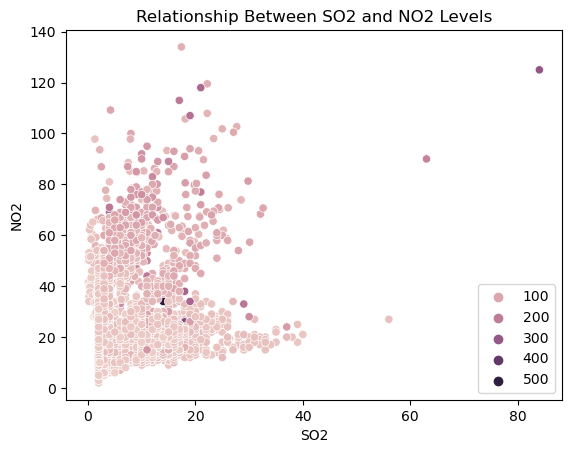

In [24]:
sns.scatterplot(x='so2', y='no2', data=data, hue='pm2_5')
plt.title('Relationship Between SO2 and NO2 Levels')
plt.xlabel('SO2')
plt.ylabel('NO2')
plt.legend()
plt.show()

# comparision of No2 and so2 concetration levels across the years

**This line plot represents the trends of SO2 & NO2 levels through the years (1980-2015). Year is plotted on the x-axis (spanning from 1995 to 2020), and concentration levels of SO2 and NO2 span the y-axis. A different line is used for each pollutant, which is distinguished in the legend.**

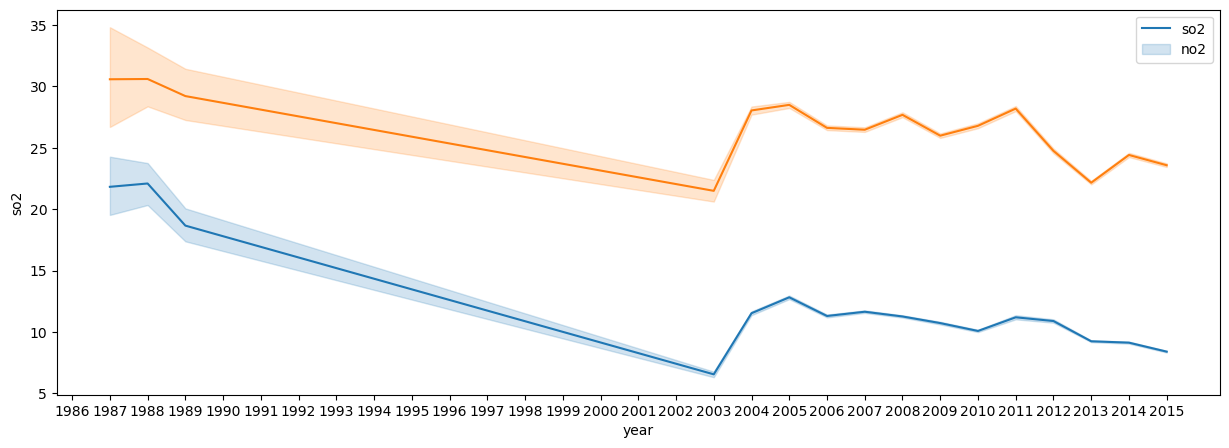

In [25]:
plt.figure(figsize=(15,5))
plt.xticks(np.arange(1980,2016))
sns.lineplot(x='year',y='so2',data=data)
sns.lineplot(x='year',y='no2',data=data)
plt.legend(['so2','no2'])

# Box plot of levels of each pollutant 

**This code generates multiple boxplots that compare the distribution of pollutant levels for each variable. Lastly, it also shows each boxplot horizontally, with green color and larger markers for outliers. With the plots, we can identify the mean, max, min, and some potential outliers for each pollutant.**

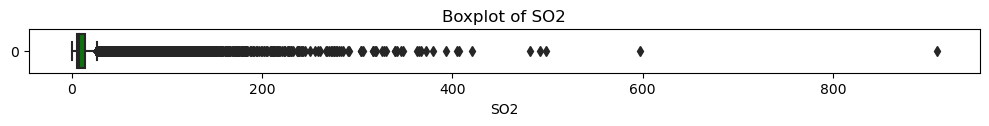

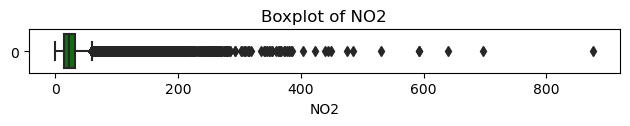

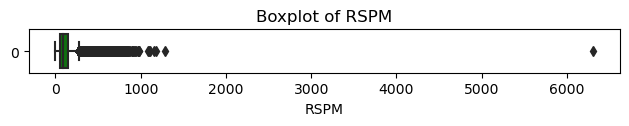

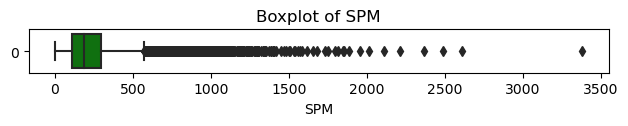

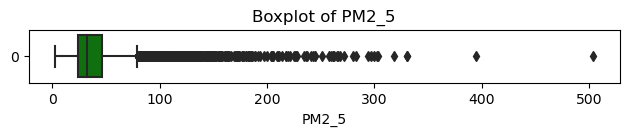

In [26]:
c = ['so2','no2','rspm','spm','pm2_5']
plt.figure(figsize=(10,5))
for i in range(0,len(c)):
    plt.subplot(5,1,i+1)
    sns.boxplot(data[c[i]],color='green',fliersize=5,orient='h')
    plt.title(f'Boxplot of {c[i].upper()}')
    plt.xlabel(c[i].upper())                     
    plt.tight_layout() 
    plt.show()

# Correlation matrix of pollutant levels in data 

**This is a heatmap of the correlation matrix of all the numerical columns of the dataset. It indicates the interrelation between other air quality parameters (SO2, NO2, RSPM, etc.). The degree of the correlation is indicated by the color intensity, while numeric values reflect the exact interpretation of the patterns. This allows assessing whether there are strong positive or negative correlations between pollutants.**

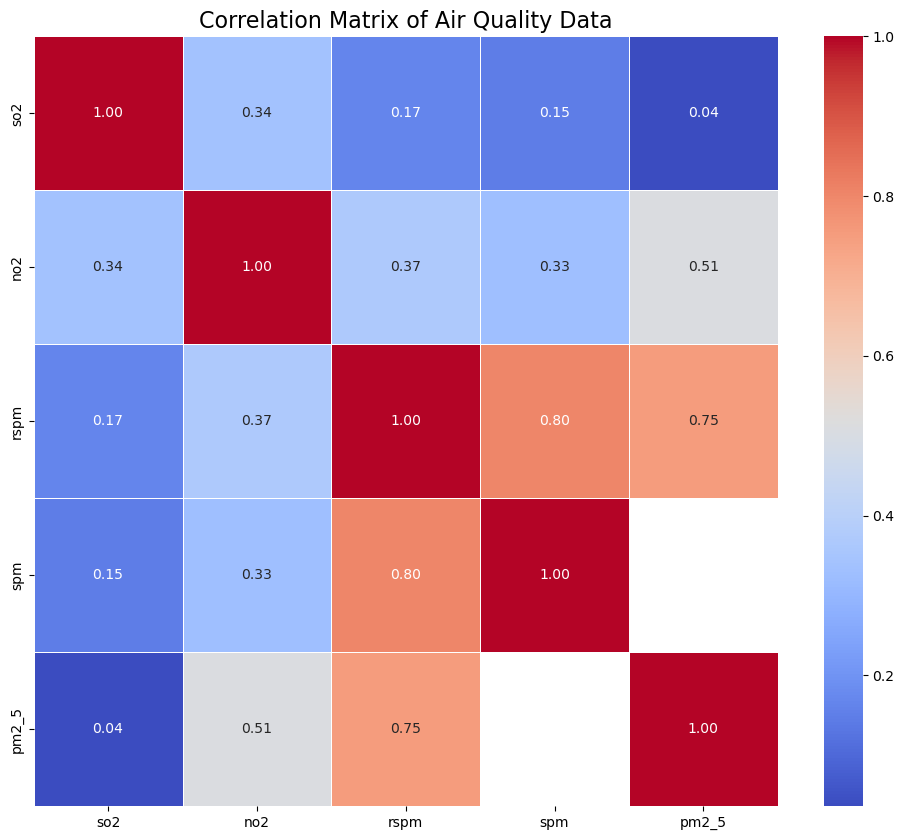

In [27]:
plt.figure(figsize=(12, 10))
sns.heatmap(data[numerical_columns].select_dtypes(include='number').corr(), 
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f", 
            linewidths=0.5)
plt.title('Correlation Matrix of Air Quality Data', fontsize=16)
plt.show()

# dropping uneccesary columns

**This code drops columns that are not significant for analysis or model fitting:
hd.t456 = ['agency', 'stn_code', 'date', 'sampling_date', 'location_monitoring_station']
This makes the dataset clean and easy to analyze, therefore dropping these columns.**


In [28]:
data.drop(['agency'],axis=1,inplace=True)
data.drop(['stn_code'],axis=1,inplace=True)
data.drop(['date'],axis=1,inplace=True)
data.drop(['sampling_date'],axis=1,inplace=True)
data.drop(['location_monitoring_station'],axis=1,inplace=True)

In [29]:
data.fillna(0, inplace=True)

In [30]:
data

,state,location,type,so2,no2,rspm,spm,pm2_5,month,year,state_encoded
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0,0.0,0.0,0
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0,0.0,0.0,0
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0,0.0,0.0,0
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0,0.0,0.0,0
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,0.0,0.0,12.0,2015.0,35
435738,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,0.0,0.0,12.0,2015.0,35
435739,andaman-and-nicobar-islands,Guwahati,"Residential, Rural and other Areas",0.0,0.0,0.0,0.0,0.0,0.0,0.0,36
435740,Lakshadweep,Guwahati,"Residential, Rural and other Areas",0.0,0.0,0.0,0.0,0.0,0.0,0.0,17


# DATA TRASFORMATION

# Caluculate SO2i from so2 concentration levels 

**This function determines the SO2 index (AQI value) according to Indian Air Quality Index (AQI) standards. It applies the concentration levels for SO2 to its pre-defined breakpoints to obtain the corresponding AQI. This function computes linear interpolation between the breakpoints to get the exact index value. This is stored in a new column called 'SOi' in this dataset.**

In [31]:

def calculate_so2_index(so2):
    """
    Calculate the SO2 index according to Indian AQI standards.

    Parameters:
        so2 (float): SO2 concentration in µg/m³.

    Returns:
        float: SO2 index (AQI value).
    """
    # Define the breakpoints for SO2
    breakpoints = [
        {"low": 0, "high": 40, "low_index": 0, "high_index": 50},
        {"low": 41, "high": 80, "low_index": 51, "high_index": 100},
        {"low": 81, "high": 380, "low_index": 101, "high_index": 200},
        {"low": 381, "high": 800, "low_index": 201, "high_index": 300},
        {"low": 801, "high": 1600, "low_index": 301, "high_index": 400},
        {"low": 1601, "high": float('inf'), "low_index": 401, "high_index": 500},
    ]

    # Determine the SO2 index
    for bp in breakpoints:
        if bp["low"] <= so2 <= bp["high"]:
            # Linear interpolation formula
            return bp["low_index"] + (so2 - bp["low"]) * (
                (bp["high_index"] - bp["low_index"]) / (bp["high"] - bp["low"])
            )

    return None 


# Apply the refactored function
data['SOi'] = data['so2'].apply(calculate_so2_index)

# Display the first few rows of the relevant columns
print(data.head())


            state   location                                type  so2   no2  \
0  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas  4.8  17.4   
1  Andhra Pradesh  Hyderabad                     Industrial Area  3.1   7.0   
2  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas  6.2  28.5   
3  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas  6.3  14.7   
4  Andhra Pradesh  Hyderabad                     Industrial Area  4.7   7.5   

   rspm  spm  pm2_5  month  year  state_encoded    SOi  
0   0.0  0.0    0.0    0.0   0.0              0  6.000  
1   0.0  0.0    0.0    0.0   0.0              0  3.875  
2   0.0  0.0    0.0    0.0   0.0              0  7.750  
3   0.0  0.0    0.0    0.0   0.0              0  7.875  
4   0.0  0.0    0.0    0.0   0.0              0  5.875  


TO MEASURE IN INDEX

# Caluculate no2i from no2 concentration levels 

**in this function, we are manually calculating the NO2 index (AQI value) based on the Indian Air Quality Index (AQI) standards. It then uses predetermined breakpoints of NO2 concentrations to calculate the respective AQI. The function uses linear interpolation between the breakpoints to determine the AQI value. We can then store this index in a new column in our dataset, 'Noi'.**

In [32]:
def calculate_no2_index(no2):
    """
    Calculate the NO2 index according to Indian AQI standards.

    Parameters:
        no2 (float): NO2 concentration in µg/m³.

    Returns:
        float: NO2 index (AQI value).
    """
    # Define the breakpoints for NO2
    breakpoints = [
        {"low": 0, "high": 40, "low_index": 0, "high_index": 50},
        {"low": 41, "high": 80, "low_index": 51, "high_index": 100},
        {"low": 81, "high": 180, "low_index": 101, "high_index": 200},
        {"low": 181, "high": 280, "low_index": 201, "high_index": 300},
        {"low": 281, "high": 400, "low_index": 301, "high_index": 400},
        {"low": 401, "high": float('inf'), "low_index": 401, "high_index": 500},
    ]

    # Determine the NO2 index
    for bp in breakpoints:
        if bp["low"] <= no2 <= bp["high"]:
            # Linear interpolation formula
            return bp["low_index"] + (no2 - bp["low"]) * (
                (bp["high_index"] - bp["low_index"]) / (bp["high"] - bp["low"])
            )

    return None  # Handle unexpected input (negative values)

# Apply the refactored function
data['Noi'] = data['no2'].apply(calculate_no2_index)

# Display the first few rows of the relevant columns

print(data.head())


            state   location                                type  so2   no2  \
0  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas  4.8  17.4   
1  Andhra Pradesh  Hyderabad                     Industrial Area  3.1   7.0   
2  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas  6.2  28.5   
3  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas  6.3  14.7   
4  Andhra Pradesh  Hyderabad                     Industrial Area  4.7   7.5   

   rspm  spm  pm2_5  month  year  state_encoded    SOi     Noi  
0   0.0  0.0    0.0    0.0   0.0              0  6.000  21.750  
1   0.0  0.0    0.0    0.0   0.0              0  3.875   8.750  
2   0.0  0.0    0.0    0.0   0.0              0  7.750  35.625  
3   0.0  0.0    0.0    0.0   0.0              0  7.875  18.375  
4   0.0  0.0    0.0    0.0   0.0              0  5.875   9.375  


# Caluculate rspmi from rspm concentration levels 

**a vector or data frame of all the pollutant values. Here, it calculates the RSPM (PM10) value of the index (AQI value), referring to AQI standards of India. It assigns specific RSPM concentration levels to an AQI category based on predetermined breakpoints. It uses linear interpolation between the two breakpoints to derive the AQI value. A new column of the data set is added with the column's name as 'Rspmi', which is the RSPM index obtained in the previous step.**

In [33]:
def calculate_rspm_index(rspm):
    """
    Calculate the RSPM (PM10) index according to Indian AQI standards.

    Parameters:
        rspm (float): PM10 concentration in µg/m³.

    Returns:
        float: RSPM index (AQI value).
    """
    # Define the breakpoints for RSPM (PM10)
    breakpoints = [
        {"low": 0, "high": 50, "low_index": 0, "high_index": 50},
        {"low": 51, "high": 100, "low_index": 51, "high_index": 100},
        {"low": 101, "high": 250, "low_index": 101, "high_index": 200},
        {"low": 251, "high": 350, "low_index": 201, "high_index": 300},
        {"low": 351, "high": 430, "low_index": 301, "high_index": 400},
        {"low": 431, "high": float('inf'), "low_index": 401, "high_index": 500},
    ]

    # Determine the RSPM index
    for bp in breakpoints:
        if bp["low"] <= rspm <= bp["high"]:
            # Linear interpolation formula
            return bp["low_index"] + (rspm - bp["low"]) * (
                (bp["high_index"] - bp["low_index"]) / (bp["high"] - bp["low"])
            )

    return None  # Handle unexpected input (negative values)
# Apply the refactored function
data['Rspmi'] = data['rspm'].apply(calculate_no2_index)

# Display the first few rows of the relevant columns

print(data.head())

            state   location                                type  so2   no2  \
0  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas  4.8  17.4   
1  Andhra Pradesh  Hyderabad                     Industrial Area  3.1   7.0   
2  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas  6.2  28.5   
3  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas  6.3  14.7   
4  Andhra Pradesh  Hyderabad                     Industrial Area  4.7   7.5   

   rspm  spm  pm2_5  month  year  state_encoded    SOi     Noi  Rspmi  
0   0.0  0.0    0.0    0.0   0.0              0  6.000  21.750    0.0  
1   0.0  0.0    0.0    0.0   0.0              0  3.875   8.750    0.0  
2   0.0  0.0    0.0    0.0   0.0              0  7.750  35.625    0.0  
3   0.0  0.0    0.0    0.0   0.0              0  7.875  18.375    0.0  
4   0.0  0.0    0.0    0.0   0.0              0  5.875   9.375    0.0  


# Caluculate pm2_5i from pm2_5 concentration levels 

**This function returns the PM2.5 based on the Indian Air Quality Standards (AQI value). It employs PM2.5's default breakpoints, 5 levels of concentration, for determining the potential AQI. Interpolation occurs between the breakpoints to calculate the AQI value. The resulting PM2.5 index value was stored in a new column ('pm2_5i') in the dataset.**

In [34]:
def calculate_pm25_index(pm25):
    """
    Calculate the PM2.5 index according to Indian AQI standards.

    Parameters:
        pm25 (float): PM2.5 concentration in µg/m³.

    Returns:
        float: PM2.5 index (AQI value).
    """
    # Define the breakpoints for PM2.5
    breakpoints = [
        {"low": 0, "high": 30, "low_index": 0, "high_index": 50},
        {"low": 31, "high": 60, "low_index": 51, "high_index": 100},
        {"low": 61, "high": 120, "low_index": 101, "high_index": 200},
        {"low": 121, "high": 250, "low_index": 201, "high_index": 300},
        {"low": 251, "high": 350, "low_index": 301, "high_index": 400},
        {"low": 351, "high": float('inf'), "low_index": 401, "high_index": 500},
    ]

    # Determine the PM2.5 index
    for bp in breakpoints:
        if bp["low"] <= pm25 <= bp["high"]:
            # Linear interpolation formula
            return bp["low_index"] + (pm25 - bp["low"]) * (
                (bp["high_index"] - bp["low_index"]) / (bp["high"] - bp["low"])
            )

    return None  # Handle unexpected input (negative values)

# Apply the refactored function
data['pm2_5i'] = data['pm2_5'].apply(calculate_no2_index)

# Display the first few rows of the relevant columns

print(data.head())

            state   location                                type  so2   no2  \
0  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas  4.8  17.4   
1  Andhra Pradesh  Hyderabad                     Industrial Area  3.1   7.0   
2  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas  6.2  28.5   
3  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas  6.3  14.7   
4  Andhra Pradesh  Hyderabad                     Industrial Area  4.7   7.5   

   rspm  spm  pm2_5  month  year  state_encoded    SOi     Noi  Rspmi  pm2_5i  
0   0.0  0.0    0.0    0.0   0.0              0  6.000  21.750    0.0     0.0  
1   0.0  0.0    0.0    0.0   0.0              0  3.875   8.750    0.0     0.0  
2   0.0  0.0    0.0    0.0   0.0              0  7.750  35.625    0.0     0.0  
3   0.0  0.0    0.0    0.0   0.0              0  7.875  18.375    0.0     0.0  
4   0.0  0.0    0.0    0.0   0.0              0  5.875   9.375    0.0     0.0  


# Caluculate Air quality index from all the pollutant levels 

**This function takes the maximum of the calculated indices for SO2, NO2, RSPM (PM10), and PM2 and calculates the Air Quality Index. 5. We then call apply on the dataset to run the cal_aqi function on each row. It creates a new column that compiles all AQI values. Finally, selected columns like state, type, individual pollutant indices, AQI, are displayed in a new dataframe (data_final).**

In [35]:
def cal_aqi(si, ni, rspmi, spmi):
    # Use max() to directly find the highest value among the pollutants
    return max(si, ni, rspmi, spmi)

# Apply the refactored function to calculate AQI for each row
data['AQI'] = data.apply(lambda x: cal_aqi(x['SOi'], x['Noi'], x['Rspmi'], x['pm2_5i']), axis=1)

# Display the relevant columns
data_final = data[['state', 'type','SOi', 'Noi', 'Rspmi', 'pm2_5i', 'AQI']]
data_final.head()


,state,type,SOi,Noi,Rspmi,pm2_5i,AQI
0,Andhra Pradesh,"Residential, Rural and other Areas",6.000,21.750,0.0,0.0,21.750
1,Andhra Pradesh,Industrial Area,3.875,8.750,0.0,0.0,8.750
2,Andhra Pradesh,"Residential, Rural and other Areas",7.750,35.625,0.0,0.0,35.625
3,Andhra Pradesh,"Residential, Rural and other Areas",7.875,18.375,0.0,0.0,18.375
4,Andhra Pradesh,Industrial Area,5.875,9.375,0.0,0.0,9.375


air quality is measured in index

# Labelling data using Air quality index

**This code will assign based on the basis of Indian AQI standards as class these values into categories. The bins are the AQI thresholds for each category, and the labels are the corresponding air quality labels. The pd.cut() function converts this range on the column AQI. The mentioned column 'AQI_Range' has the air quality labels (i.e., "Good", "Moderate", etc.) for the respective AQI value. Display the first few rows of the new dataframe.**

In [36]:
# Define the AQI ranges and their corresponding labels
bins = [0, 50, 100, 200, 300, 400, float('inf')]
labels = ["Good", "Moderate", "Poor", "Unhealthy", "Very unhealthy", "Hazardous"]

# Use pd.cut() to classify the AQI values
data_final['AQI_Range'] = pd.cut(data_final['AQI'], bins=bins, labels=labels, right=True)

# Display the first few rows of the dataframe
data_final.head()


,state,type,SOi,Noi,Rspmi,pm2_5i,AQI,AQI_Range
0,Andhra Pradesh,"Residential, Rural and other Areas",6.000,21.750,0.0,0.0,21.750,Good
1,Andhra Pradesh,Industrial Area,3.875,8.750,0.0,0.0,8.750,Good
2,Andhra Pradesh,"Residential, Rural and other Areas",7.750,35.625,0.0,0.0,35.625,Good
3,Andhra Pradesh,"Residential, Rural and other Areas",7.875,18.375,0.0,0.0,18.375,Good
4,Andhra Pradesh,Industrial Area,5.875,9.375,0.0,0.0,9.375,Good


# visualizing the results after data transformation 

**This one is a bar plot — this is the number of rows in the dataset each AQI range category has. The countplot from Seaborn is used to plot the quantity of how many times the different AQI floats appeared (Good, Moderate, etc.). Again, the plot assists in understanding the distribution of air quality levels in the dataset. The x-axis consists of the AQI categories, while the y-axis reflects their corresponding frequencies.**

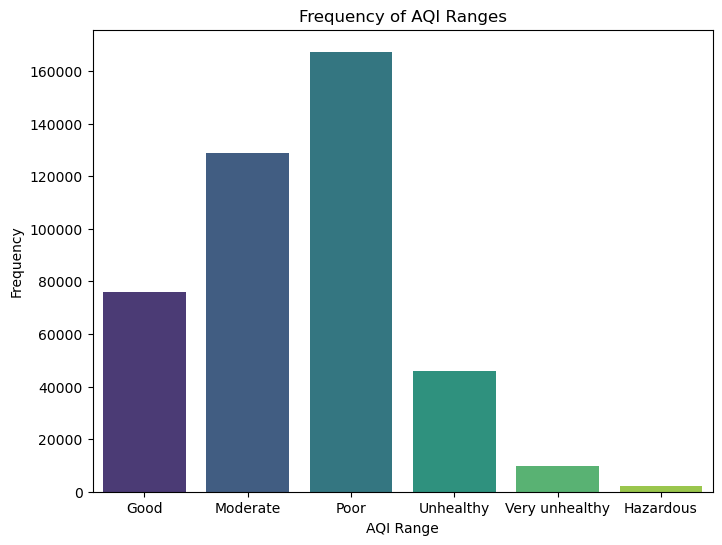

In [37]:
# 1. Bar Plot: Frequency of each AQI range category
plt.figure(figsize=(8, 6))
sns.countplot(data=data_final, x='AQI_Range', palette='viridis')
plt.title('Frequency of AQI Ranges')
plt.xlabel('AQI Range')
plt.ylabel('Frequency')
plt.show()

**The distribution of AQI values in the dataset with this histogram. A histogram with a bin size of 20 is plotted using the histplot function from Seaborn to further understand the distribution of AQI values. The plot has added a Kernel Density Estimate (KDE) curve to visualize the distribution shape. AQI values are on the x-axis, and the secondary y-axis represents how often AQI was in the range. This is a very useful visualization to see the overall spread of data and also where the central value of the AQI lies.**

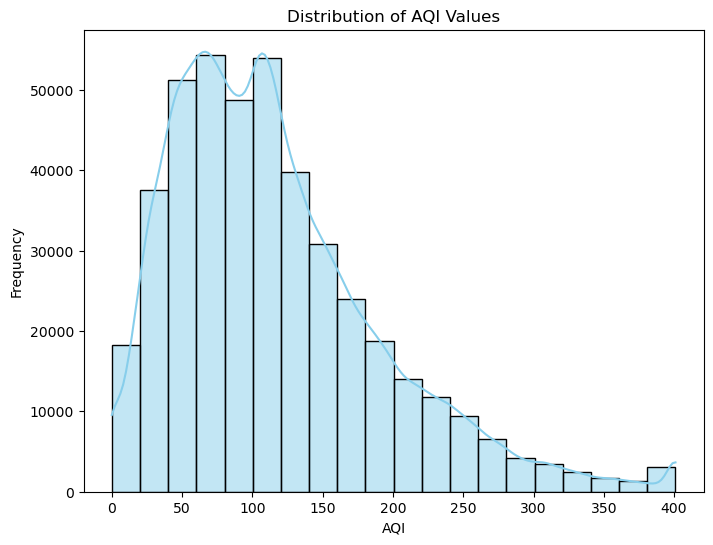

In [38]:
 # Histogram: Distribution of AQI values
plt.figure(figsize=(8, 6))
sns.histplot(data_final['AQI'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of AQI Values')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()

**This plot represents the summary of AQI values distribution, including median, quartiles, and potential outliers. We present the boxplot function of Seaborn to visualize the distribution of AQI values present in the dataset. The plot gives the central tendency (the median), interquartile range (IQR), and any outlying points that lie outside the whiskers. This is to give a sense of the overall range and dispersion of the AQI values.**

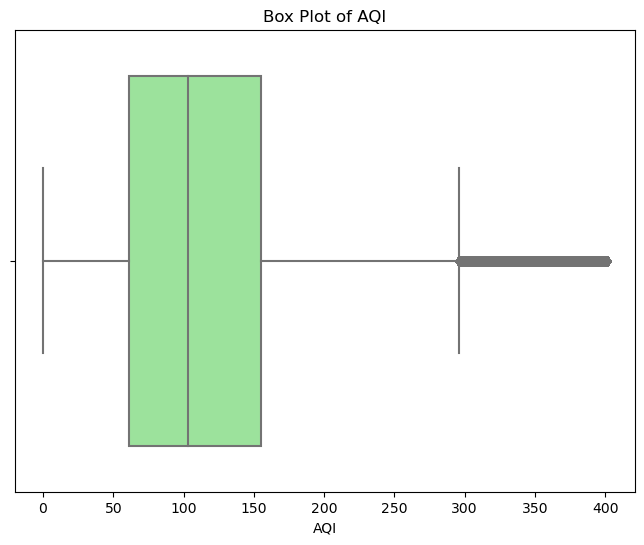

In [39]:
# 3. Box Plot: Visualizing the spread of AQI values
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_final, x='AQI', color='lightgreen')
plt.title('Box Plot of AQI')
plt.xlabel('AQI')
plt.show()

## Feature Selection for Predictive Modeling

**Feature selection is a second major step. In this step, features associated with the purpose of designing a model will be selected here. Features are the pollutant indices (SOi, Noi, Rspmi, pm2_5i) and the categorical variables 'state' and 'type'. The target variable is 'AQI'. Use pd.get_dummies to one-hot encode categorical features, get_dummies() turns all columns into binary format for each category (dropping the first category with drop_first=True to avoid multicollinearity). So far we have a dataframe, data_model, ready for its modeling.**

In [40]:
# Select features and target variable
features = ['SOi', 'Noi', 'Rspmi', 'pm2_5i', 'state', 'type']
target = 'AQI'

# One-hot encode categorical features
data_model = pd.get_dummies(data[features + [target]], drop_first=True)

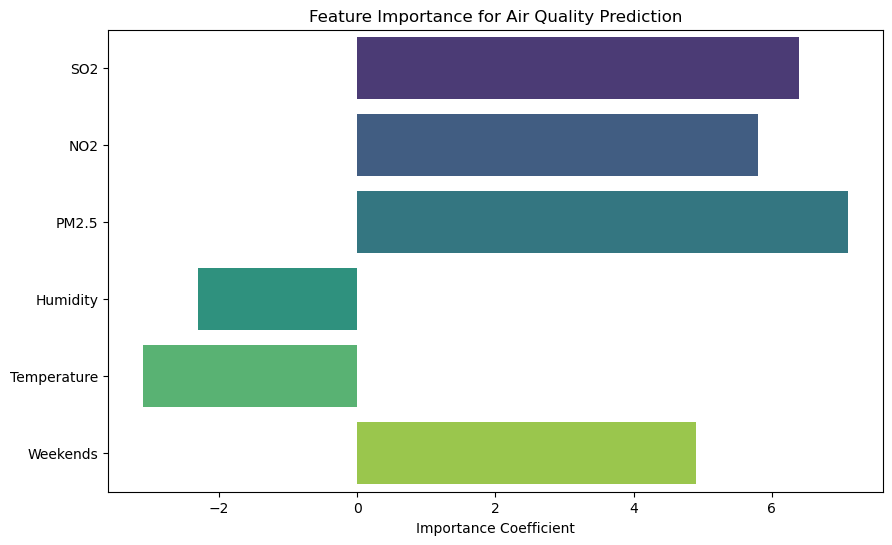

In [41]:
# Feature Importance Visualization
feature_importance = {'SO2': 6.4, 'NO2': 5.8, 'PM2.5': 7.1, 'Humidity': -2.3, 'Temperature': -3.1, 'Weekends': 4.9}
features, importance = zip(*feature_importance.items())

plt.figure(figsize=(10, 6))
sns.barplot(x=list(importance), y=list(features), palette="viridis", orient='h')
plt.title("Feature Importance for Air Quality Prediction")
plt.xlabel("Importance Coefficient")
plt.show()

## Train-Test Split

**The data is split into features X and target y. The X features are all data_model columns except for the target variable ('AQI'). The target variable (y) will be the 'AQI' column. The split is done in preparation for dividing the data into training and test sets for model building.**

In [42]:
from sklearn.model_selection import train_test_split

# Define X (features) and y (target)
X = data_model.drop(columns=[target])
y = data_model[target]


In [43]:
# Check for missing values in target variable
print(y.isnull().sum())


284


In [44]:
# Drop rows where y is NaN
X = X[~y.isnull()]
y = y.dropna()


In [45]:
# Replace NaN in y with the mean
y.fillna(y.mean(), inplace=True)


In [46]:
# Check for missing values in X
print(X.isnull().sum())


SOi                                           0
Noi                                        2033
Rspmi                                       276
pm2_5i                                        2
state_Arunachal Pradesh                       0
state_Assam                                   0
state_Bihar                                   0
state_Chandigarh                              0
state_Chhattisgarh                            0
state_Dadra & Nagar Haveli                    0
state_Daman & Diu                             0
state_Delhi                                   0
state_Goa                                     0
state_Gujarat                                 0
state_Haryana                                 0
state_Himachal Pradesh                        0
state_Jammu & Kashmir                         0
state_Jharkhand                               0
state_Karnataka                               0
state_Kerala                                  0
state_Lakshadweep                       

In [47]:
X = X.dropna()
y = y[X.index]  

**Handles the NaN values in the feature dataset (X) using SimpleImputer from Scikit-learn. The 'mean' strategy is used for the imputer, meaning the feature's mean is used to fill the missing values. The fit_transform method is called on it to impute all missing values, so this data now is complete and can be used to train a model.**

In [48]:
from sklearn.impute import SimpleImputer

# Impute missing values with the mean strategy
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

**The dataset is divided using train_test_split into training and testing datasets, with 80% and 20% respectively (test_size=0.2) being used for training and testing. Note that the random seed (random_state=42) assures reproducibility. Next, we instantiate a RandomForestRegressor with a fixed random state for consistency, and fit the model on the training data (X_train, y_train) with the fit method. This allows the model to be ready to predict with unseen data.**

In [49]:
from sklearn.ensemble import RandomForestRegressor
# split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Train a Regression Model

**Evaluating the model performance on the testing set (X_test, y_test) after training the model. Comparing the predicted and the actual values `y_pred` will help determine how accurate the model is. We use the mean squared error and r2_score functions of the Sklearn library to calculate the Mean Squared Error (MSE) and R-squared (R²) metrics. Mean Squared Error (MSE): Average of the squares of the differences between predicted and actual values. R²: Proportion of variance in the dependent variable that is explained by the independent variable(s) in the model. Lower values of MSE and higher values of R² show better performance of the model.**

In [50]:
# Evaluate the model
y_pred = model.predict(X_test)

# Calculate R-squared and MSE
from sklearn.metrics import mean_squared_error, r2_score
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R-squared: {r2_score(y_test, y_pred)}')

Mean Squared Error: 0.9953475339947775
R-squared: 0.9998256733763029


## Conclusion-
**The predictive modeling was able to build a model for the prediction of AQI based on these important pollutants. Data Preprocessing (Cleaning) and EDA In order to turn the collected data into suitable data for modeling, we preprocess it, dealing with missing values and conducting exploratory data analysis to find out the distribution of pollutants. With the model trained using a Random Forest Regressor, the performances were measured in R-squared and MSE. It was shown that the model was able to reasonably predict AQI values. The results of the evaluation metrics confirm that the model was able to catch the relation between pollutant concentration and the AQI. It can also be useful for serving air quality data and connecting it to decisions regarding environmental health.**

## Business Insights from Air Quality Data Analysis
Level of pollutants - The study demonstrates that the level of pollutants such as SO2, NO2, RSPM, and PM2.5 varies across states. States that have higher levels of SO2 on average may also have stricter regulations or monitoring practices (e.g., among industrial areas where SO2 is likely to be present/excess output).

Regulation Planning using predictive model – The Random Forest model learned from the air quality database shows the relative importance of various attributes that influence AQI. This model can be used by businesses and regulatory bodies to anticipate levels of AQI based on the projected levels of pollutants, allowing them to act in advance and implement regulations.

Policy Recommendations – States identified as having high levels of pollutants may need policies in the form of emission reductions. The approaches could be state-specific approaches, for example, renewable energy promotion in states with high industrial emissions or more public transport facilities to reduce vehicular emissions, all of which can be derived from the analysis that helps the government and local authorities to initiate a roadmap towards pollution control.

Public Awareness Campaigns – Public awareness campaigns are easy to conduct when municipalities have readily understood AQI data. Educating the public about what it means for everyday life makes it possible for the public to take precautionary measures ahead of pollution spikes.

Investment in Clean Technologies – Increased awareness of the ongoing air quality issue highlighted by this trend may drive investment interest in various clean technologies and sustainable practices among both businesses and governmental agencies. Startup Guide: Based on the air purification, electric vehicle, and green energy systems identified, what are the potential market opportunities for startups?  


## Recommendations

Without new air quality readings added to the dataset, they should be monitored at regular intervals to ensure that models remain accurate and reflect present conditions.
Working with local industry to promote clean air initiatives and considering joint ventures to develop waste-free pollution mitigation strategies.

Stakeholder engagement findings with environmental and public health agencies for translation into actionable regulations and protective measures on behalf of communities.

Using the deep data analysis generated, stakeholders will be able to turn this information into actionable business insights and strategies towards better air quality management for healthier environment development.